# Data block API

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## download untar image files

In [2]:
#export
import gzip
from pathlib import Path
import tarfile
from exp.nb_07bMagda import *

In [3]:
data_folder = Path('/home/magda/datasets')
image_file = data_folder/'imagenette2-160.tgz'

In [4]:
# image_tar = tarfile.open(image_file)

In [5]:
# image_tar.extractall(data_folder)

In [6]:
#export
def ls(y):
    for x in y.iterdir():
        print(x)
Path.ls = ls

In [7]:
image_folder = data_folder/'imagenette2-160'

In [8]:
image_folder.ls()

/home/magda/datasets/imagenette2-160/val
/home/magda/datasets/imagenette2-160/train


In [9]:
(image_folder/'train').ls()

/home/magda/datasets/imagenette2-160/train/n03394916
/home/magda/datasets/imagenette2-160/train/n03888257
/home/magda/datasets/imagenette2-160/train/n03000684
/home/magda/datasets/imagenette2-160/train/n03425413
/home/magda/datasets/imagenette2-160/train/n03417042
/home/magda/datasets/imagenette2-160/train/n03445777
/home/magda/datasets/imagenette2-160/train/n03028079
/home/magda/datasets/imagenette2-160/train/n01440764
/home/magda/datasets/imagenette2-160/train/n02979186
/home/magda/datasets/imagenette2-160/train/n02102040


In [10]:
# image_file.unlink()

In [11]:
data_folder.ls()

/home/magda/datasets/binarized_mnist
/home/magda/datasets/imagenette2-160
/home/magda/datasets/mnist
/home/magda/datasets/synth
/home/magda/datasets/synthetic_mixture
/home/magda/datasets/synth_mixture


## process images

In [12]:
imgs = next((image_folder/'train').iterdir())
img = next(imgs.iterdir())
img

PosixPath('/home/magda/datasets/imagenette2-160/train/n03394916/ILSVRC2012_val_00041958.JPEG')

In [13]:
#export
import PIL
import os
import mimetypes

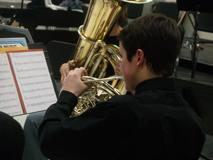

In [14]:
img_pil = PIL.Image.open(img)
img_pil

In [15]:
image_extensions = []
for key, value in mimetypes.types_map.items():
    if 'image' in value:
        image_extensions.append(key)
print(image_extensions)

['.bmp', '.gif', '.ief', '.jpg', '.jpe', '.jpeg', '.png', '.svg', '.tiff', '.tif', '.ico', '.ras', '.pnm', '.pbm', '.pgm', '.ppm', '.rgb', '.xbm', '.xpm', '.xwd']


In [16]:
#export
def get_image_files(img_path):
    img_path = Path(img_path)
    
    def _get_images(dtype='train'):
        ipath = img_path/dtype
        img_list = []
        cls_list = []
        for x in (ipath).iterdir():
            for y in x.iterdir():
                if 'image' in mimetypes.guess_type(y)[0]:
                    img_list.append(y)
                    cls_list.append(x.stem)
        return img_list, cls_list
    
    image_lists = dict(zip(['train_images', 'train_labels', 'valid_images', 'valid_labels'], _get_images('train')+_get_images('val')))
    return image_lists                       

In [17]:
%time
IMAGE_FOLDER = Path('/home/magda/datasets/imagenette2-160')
image_lists = get_image_files(IMAGE_FOLDER)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [19]:
len(image_lists['train_images'])

9469

## Labelling

In [20]:
labels = frozenset(image_lists['train_labels'])
label_voc = dict(zip(labels, range(len(labels))))

In [21]:
label_voc

{'n03888257': 0,
 'n02102040': 1,
 'n03000684': 2,
 'n03394916': 3,
 'n01440764': 4,
 'n02979186': 5,
 'n03417042': 6,
 'n03028079': 7,
 'n03445777': 8,
 'n03425413': 9}

## refactor

In [49]:
class ImageList():
    def __init__(self, img_path, dtype='train', label_voc=None):
        self.img_path = Path(img_path)
        self.images, self.labels = self._list_images(dtype)
        if label_voc is None:
            labels = frozenset(self.labels)
            self.label_voc = dict(zip(labels, range(len(labels))))
        else:
            self.label_voc = label_voc
       
    def _list_images(self, dtype='train'):
        ipath = self.img_path/dtype
        img_list = []
        cls_list = []
        for x in (ipath).iterdir():
            for y in x.iterdir():
                if 'image' in mimetypes.guess_type(y)[0]:
                    img_list.append(y)
                    cls_list.append(x.stem)
        return img_list, cls_list
    
    
    def __getitem__(self, key):
        return PIL.Image.open(self.images[key])
    


In [50]:
img_train = ImageList(IMAGE_FOLDER)

In [53]:
img = img_train[0]
img

AttributeError: 'list' object has no attribute 'read'